In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("shop_smart_ecommerce.csv")

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Text(0.5, 1.0, 'Likely to make a puchase or not')

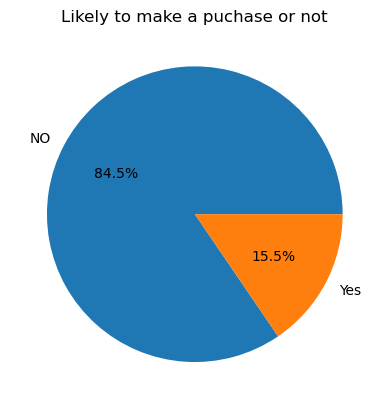

In [6]:
#EDA

#how balance classes are
classes_count =df["Revenue"].value_counts()
plt.pie(classes_count,labels = ["NO","Yes"], autopct ="%1.1f%%")
plt.title("Likely to make a puchase or not")

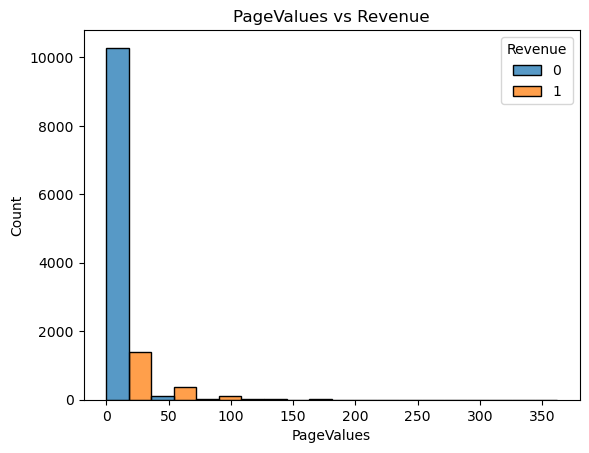

In [14]:
#analyze 
sns.histplot(
    data=df,
    x="PageValues",
    hue="Revenue",
    bins=10,
    multiple="dodge"
)
plt.title("PageValues vs Revenue")
plt.show()

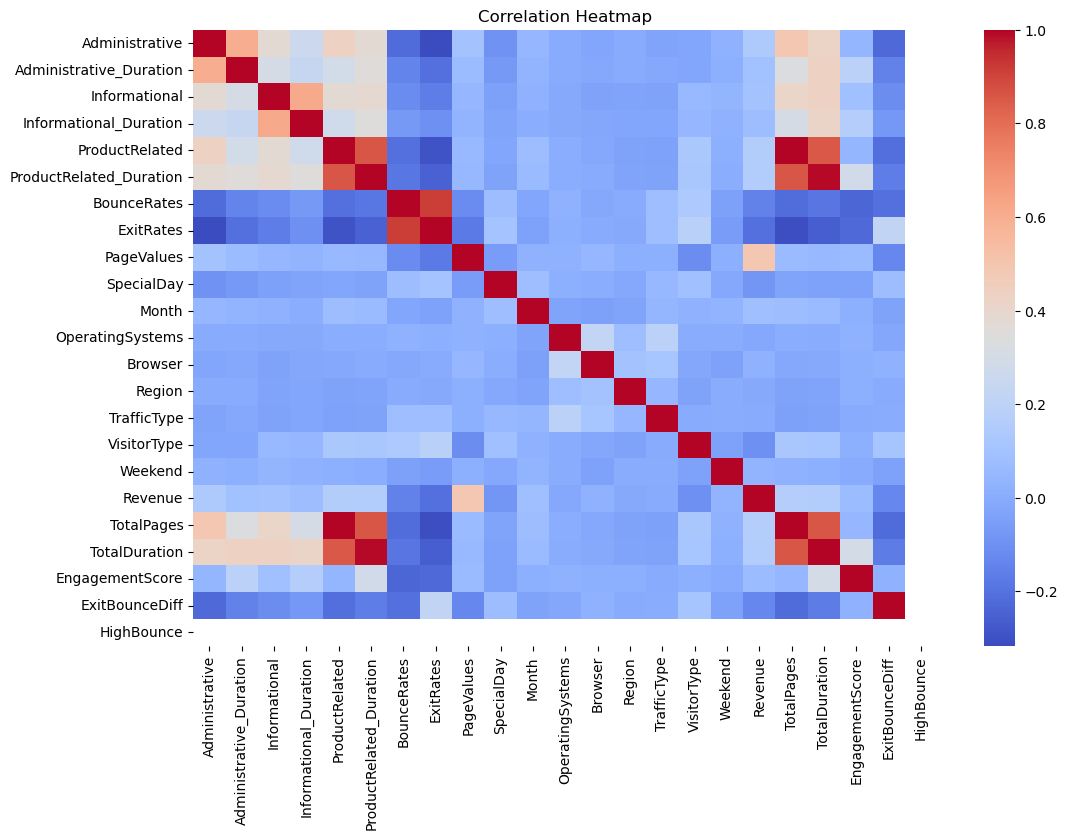

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df.groupby('Revenue')[
        ['BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration']
    ].mean()

,BounceRates,ExitRates,PageValues,ProductRelated_Duration
Revenue,,,,
False,0.025317,0.047378,1.975998,1069.987809
True,0.005117,0.019555,27.264518,1876.209615


In [8]:
#Feature enginnering
# Total pages visited
df['TotalPages'] = (
    df['Administrative'] +
    df['Informational'] +
    df['ProductRelated']
)

# Total duration spent
df['TotalDuration'] = (
    df['Administrative_Duration'] +
    df['Informational_Duration'] +
    df['ProductRelated_Duration']
)


# Engagement score
df['EngagementScore'] = df['TotalDuration'] / (df['TotalPages'] + 1)

# Exit vs Bounce difference
df['ExitBounceDiff'] = df['ExitRates'] - df['BounceRates']

# High bounce flag
df['HighBounce'] = (df['BounceRates'] > 0.2).astype(int)

In [9]:
#Encoding

# Binary encoding
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

from sklearn.preprocessing import LabelEncoder

label_cols = ['Month', 'VisitorType']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])



In [10]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [11]:
#training model
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, random_state=42)

In [12]:
#Evaluation
from sklearn.metrics import f1_score, confusion_matrix

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

F1 Score: 0.6341463414634146

Confusion Matrix:
[[1990   94]
 [ 161  221]]
